In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
df=pd.read_csv('weatherAUS.csv')

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118904 entries, 0 to 118903
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           118904 non-null  object 
 1   Location       118904 non-null  object 
 2   MinTemp        117587 non-null  float64
 3   MaxTemp        117780 non-null  float64
 4   Rainfall       115975 non-null  float64
 5   Evaporation    66969 non-null   float64
 6   Sunshine       61816 non-null   float64
 7   WindGustDir    109042 non-null  object 
 8   WindGustSpeed  109068 non-null  float64
 9   WindDir9am     109746 non-null  object 
 10  WindDir3pm     114977 non-null  object 
 11  WindSpeed9am   117286 non-null  float64
 12  WindSpeed3pm   115995 non-null  float64
 13  Humidity9am    116474 non-null  float64
 14  Humidity3pm    115371 non-null  float64
 15  Pressure9am    108037 non-null  float64
 16  Pressure3pm    108072 non-null  float64
 17  Cloud9am       74109 non-null

In [ ]:
df.shape

(118904, 23)

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,117587.000000,117780.000000,115975.000000,66969.000000,61816.000000,109068.000000,117286.000000,115995.000000,116474.000000,115371.000000,108037.000000,108072.000000,74109.000000,71272.000000,117264.000000,116101.000000
mean,11.986791,22.784057,2.404894,5.314471,7.444982,40.014331,14.047235,18.870494,70.164191,52.648638,1018.034718,1015.700055,4.584760,4.626684,16.628552,21.302015
std,6.232718,6.892528,8.587149,4.257907,3.818111,13.842610,9.143375,9.116173,18.299999,20.511548,7.006681,7.560201,2.871266,2.701306,6.261816,6.713870
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,1.000000,0.000000,0.000000,-7.200000,-5.400000
25%,7.500000,17.800000,0.000000,2.600000,4.600000,30.000000,7.000000,13.000000,58.000000,38.000000,1013.400000,1011.100000,1.000000,2.000000,12.100000,16.500000
50%,11.900000,22.400000,0.000000,4.400000,8.200000,39.000000,13.000000,19.000000,71.000000,53.000000,1018.000000,1015.700000,5.000000,5.000000,16.500000,20.900000
75%,16.600000,27.500000,0.800000,7.200000,10.500000,48.000000,19.000000,24.000000,84.000000,66.000000,1022.700000,1020.300000,7.000000,7.000000,21.100000,25.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1038.200000,9.000000,9.000000,40.200000,46.700000


In [ ]:
df.nunique()

,0
Date,3436
Location,40
MinTemp,385
MaxTemp,505
Rainfall,651
Evaporation,352
Sunshine,145
WindGustDir,16
WindGustSpeed,65
WindDir9am,16


In [ ]:
import plotly.express as px
px.histogram(df, x='Location', title='Location vs. Rainy Days', color='RainToday')

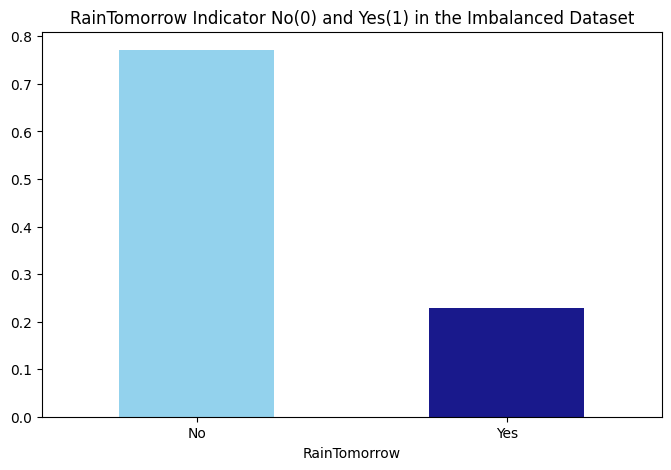

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

In [ ]:
px.histogram(df,
             x='RainTomorrow',
             color='RainToday',
             title='Rain Tomorrow vs. Rain Today')

In [ ]:
px.scatter(df.sample(2000),
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1317
MaxTemp,1124
Rainfall,2929
Evaporation,51935
Sunshine,57088
WindGustDir,9862
WindGustSpeed,9836
WindDir9am,9158


<ipython-input-13-8e83353ec5c6>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




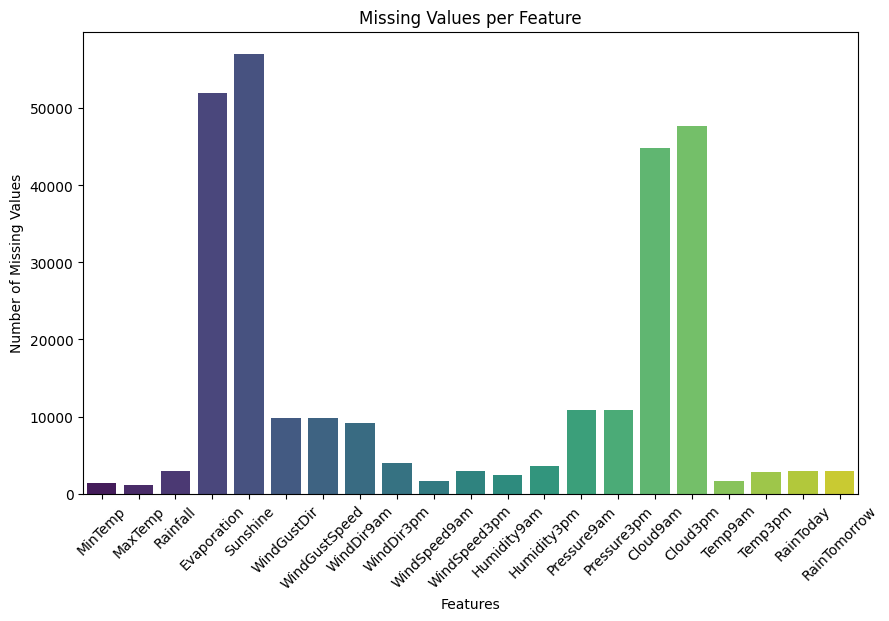

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.title('Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:
col_names = df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

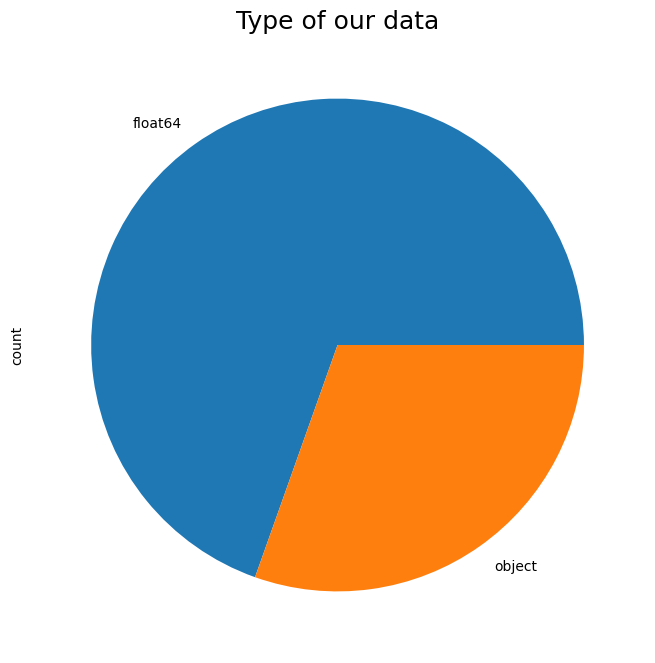

In [ ]:
plt.figure(figsize=(10, 8))
df.dtypes.value_counts().plot.pie()
plt.title('Type of our data', fontsize=18)
plt.show()

In [ ]:
categorical=[var for var in col_names if df[var].dtype=='O']

In [ ]:
categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,W,W,WNW,No,No
1,12/2/2008,Albury,WNW,NNW,WSW,No,No
2,12/3/2008,Albury,WSW,W,WSW,No,No
3,12/4/2008,Albury,NE,SE,E,No,No
4,12/5/2008,Albury,W,ENE,NW,No,No


In [ ]:
df[categorical].isnull().sum().sort_values(ascending=False)

,0
WindGustDir,9862
WindDir9am,9158
WindDir3pm,3927
RainTomorrow,2932
RainToday,2930
Location,0
Date,0


<ipython-input-20-ce1c63e1de1f>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




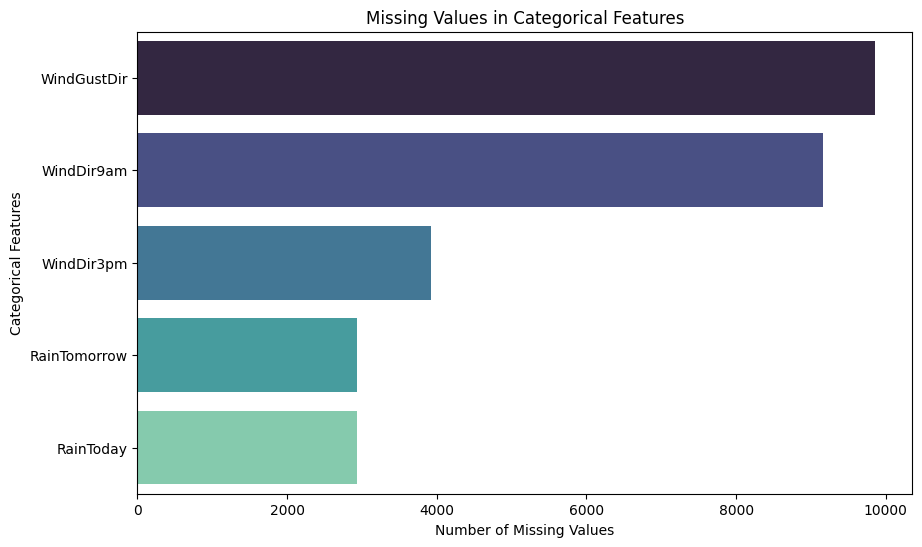

In [ ]:
#categorical = df.select_dtypes(include=['object']).columns
missing_categorical = df[categorical].isnull().sum().sort_values(ascending=False)
missing_categorical = missing_categorical[missing_categorical > 0]
plt.figure(figsize=(10,6))
sns.barplot(x=missing_categorical.values, y=missing_categorical.index, palette='mako')
plt.title('Missing Values in Categorical Features')
plt.xlabel('Number of Missing Values')
plt.ylabel('Categorical Features')
plt.show()


In [ ]:
cat1=[var for var in categorical if df[var].isnull().sum()!=0]
cat1

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [ ]:
for var in categorical :
  print(df[var].value_counts())

Date
6/18/2017    39
6/19/2017    39
6/20/2017    39
6/21/2017    39
6/22/2017    39
             ..
1/27/2008     1
1/28/2008     1
1/29/2008     1
1/30/2008     1
1/31/2008     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Brisbane            3193
Melbourne           3193
Adelaide            3193
Albury              3040
Bendigo             3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Albany              3040
MountGambier        3040
MountGinini         3040
Cairns              3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Mildura             3009
NorfolkIsland       3009
BadgerysCreek       3009
Cobar               3009
Moree               3009
CoffsHarbour        3009
Woomera             3009
MelbourneAirport    3009
Sale                3009
WaggaWagga          3009
SydneyAirport       3009
Richmond            3009
Williamtown         

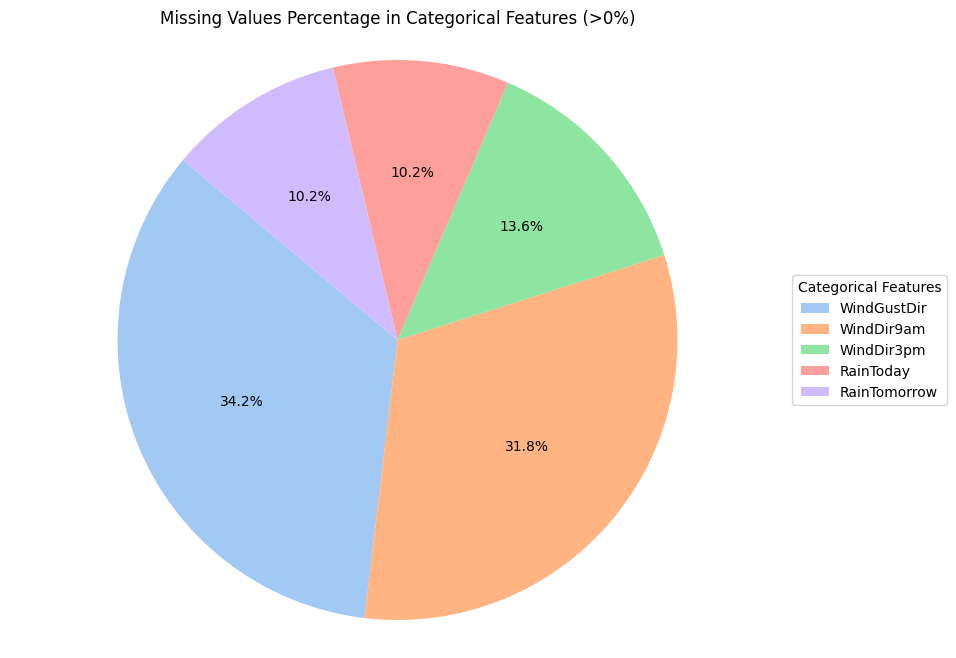

In [ ]:
missing_percentage = (df[categorical].isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]


plt.figure(figsize=(10,8))
wedges, texts, autotexts = plt.pie(
    missing_percentage,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.legend(wedges, missing_percentage.index, title="Categorical Features", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Missing Values Percentage in Categorical Features (>0%)')
plt.axis('equal')
plt.show()

In [ ]:
for var in categorical :
  print(var,len(df[var].unique()))

Date 3436
Location 40
WindGustDir 17
WindDir9am 17
WindDir3pm 17
RainToday 3
RainTomorrow 3


In [ ]:
df['Date'].dtypes

dtype('O')

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df['Date'].dtypes

dtype('<M8[ns]')

In [ ]:
df['Ýear']=df['Date'].dt.year

In [ ]:
df['Ýear'].head(100)

,Ýear
0,2008
1,2008
2,2008
3,2008
4,2008
...,...
95,2009
96,2009
97,2009
98,2009


In [ ]:
df['Month']=df['Date'].dt.month

In [ ]:
df['Month'].head(100)

,Month
0,12
1,12
2,12
3,12
4,12
...,...
95,3
96,3
97,3
98,3


In [ ]:
df['Day']=df['Date'].dt.day

In [ ]:
df['Day'].head(100)

,Day
0,1
1,2
2,3
3,4
4,5
...,...
95,6
96,7
97,8
98,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118904 entries, 0 to 118903
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           118904 non-null  datetime64[ns]
 1   Location       118904 non-null  object        
 2   MinTemp        117587 non-null  float64       
 3   MaxTemp        117780 non-null  float64       
 4   Rainfall       115975 non-null  float64       
 5   Evaporation    66969 non-null   float64       
 6   Sunshine       61816 non-null   float64       
 7   WindGustDir    109042 non-null  object        
 8   WindGustSpeed  109068 non-null  float64       
 9   WindDir9am     109746 non-null  object        
 10  WindDir3pm     114977 non-null  object        
 11  WindSpeed9am   117286 non-null  float64       
 12  WindSpeed3pm   115995 non-null  float64       
 13  Humidity9am    116474 non-null  float64       
 14  Humidity3pm    115371 non-null  float64       
 15  

In [ ]:
df.drop('Date',axis=1,inplace=True)

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Ýear,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118904 entries, 0 to 118903
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       118904 non-null  object 
 1   MinTemp        117587 non-null  float64
 2   MaxTemp        117780 non-null  float64
 3   Rainfall       115975 non-null  float64
 4   Evaporation    66969 non-null   float64
 5   Sunshine       61816 non-null   float64
 6   WindGustDir    109042 non-null  object 
 7   WindGustSpeed  109068 non-null  float64
 8   WindDir9am     109746 non-null  object 
 9   WindDir3pm     114977 non-null  object 
 10  WindSpeed9am   117286 non-null  float64
 11  WindSpeed3pm   115995 non-null  float64
 12  Humidity9am    116474 non-null  float64
 13  Humidity3pm    115371 non-null  float64
 14  Pressure9am    108037 non-null  float64
 15  Pressure3pm    108072 non-null  float64
 16  Cloud9am       74109 non-null   float64
 17  Cloud3pm       71272 non-null

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']

In [ ]:
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
df[categorical].isnull().sum()

,0
Location,0
WindGustDir,9862
WindDir9am,9158
WindDir3pm,3927
RainToday,2930
RainTomorrow,2932


In [ ]:
print(len(df['Location'].unique()))

40


In [ ]:

df.Location.value_counts()

,count
Location,
Canberra,3436
Sydney,3344
Brisbane,3193
Melbourne,3193
Adelaide,3193
Albury,3040
Bendigo,3040
Ballarat,3040
Townsville,3040


In [ ]:
pd.get_dummies(df.Location,drop_first=False).head()

,Adelaide,Albany,Albury,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Sydney,SydneyAirport,Townsville,Tuggeranong,WaggaWagga,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [ ]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [ ]:
df.WindGustDir.value_counts()

,count
WindGustDir,
W,8892
S,8003
N,7960
WSW,7882
SSE,7790
SE,7324
SW,7272
SSW,6912
ENE,6763


In [ ]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)


,0
ENE,6763
ESE,5250
N,7960
NE,6100
NNE,5782
NNW,4188
NW,5493
S,8003
SE,7324
SSE,7790


In [ ]:
print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [ ]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [ ]:
df['WindDir9am'].value_counts()

,count
WindDir9am,
N,10038
SSE,7832
SW,7657
S,7591
W,7482
SE,7258
NW,6872
NNE,6811
SSW,6706


In [ ]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

,0
ENE,5821
ESE,5344
N,10038
NE,6088
NNE,6811
NNW,5396
NW,6872
S,7591
SE,7258
SSE,7832


In [ ]:
print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [ ]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [ ]:
df['WindDir3pm'].value_counts()

,count
WindDir3pm,
W,8676
S,8539
SE,8393
WSW,8136
SSE,7699
N,7629
SW,7572
NE,7448
WNW,6957


In [ ]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

,0
ENE,6779
ESE,6329
N,7629
NE,7448
NNE,5835
NNW,5356
NW,6169
S,8539
SE,8393
SSE,7699


In [ ]:
print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [ ]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df.RainToday.value_counts()

,count
RainToday,
No,89444
Yes,26530


In [ ]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [ ]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

,0
Yes,26530
NaN,2930


In [ ]:
numerical=[var for var in df.columns if df[var].dtype!='O']

In [ ]:
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Ýear',
 'Month',
 'Day']

In [ ]:
df[numerical].isnull().sum()

,0
MinTemp,1317
MaxTemp,1124
Rainfall,2929
Evaporation,51935
Sunshine,57088
WindGustSpeed,9836
WindSpeed9am,1618
WindSpeed3pm,2909
Humidity9am,2430
Humidity3pm,3533


<ipython-input-67-656ddb82f6bc>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




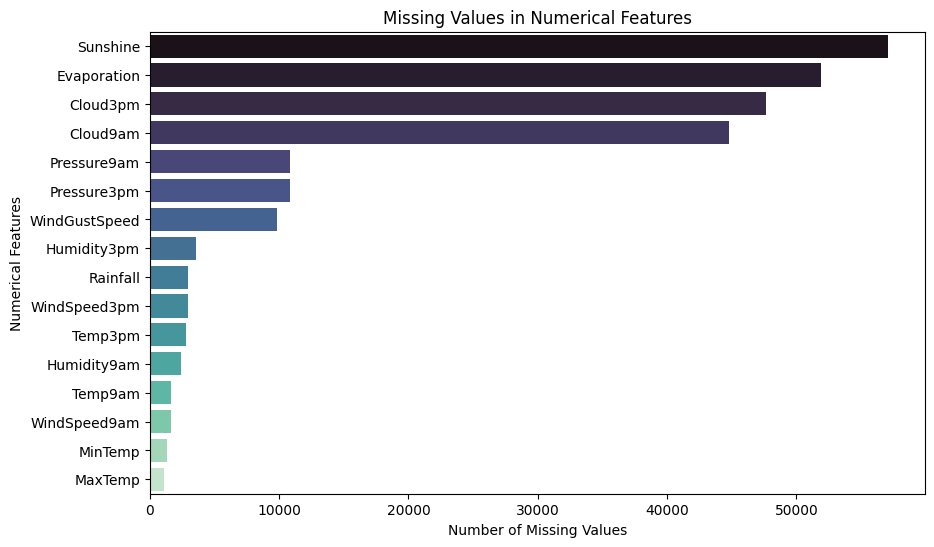

In [ ]:
missing_numerical = df[numerical].isnull().sum().sort_values(ascending=False)
missing_numerical = missing_numerical[missing_numerical > 0]
plt.figure(figsize=(10,6))
sns.barplot(x=missing_numerical.values, y=missing_numerical.index, palette='mako')
plt.title('Missing Values in Numerical Features')
plt.xlabel('Number of Missing Values')
plt.ylabel('Numerical Features')
plt.show()


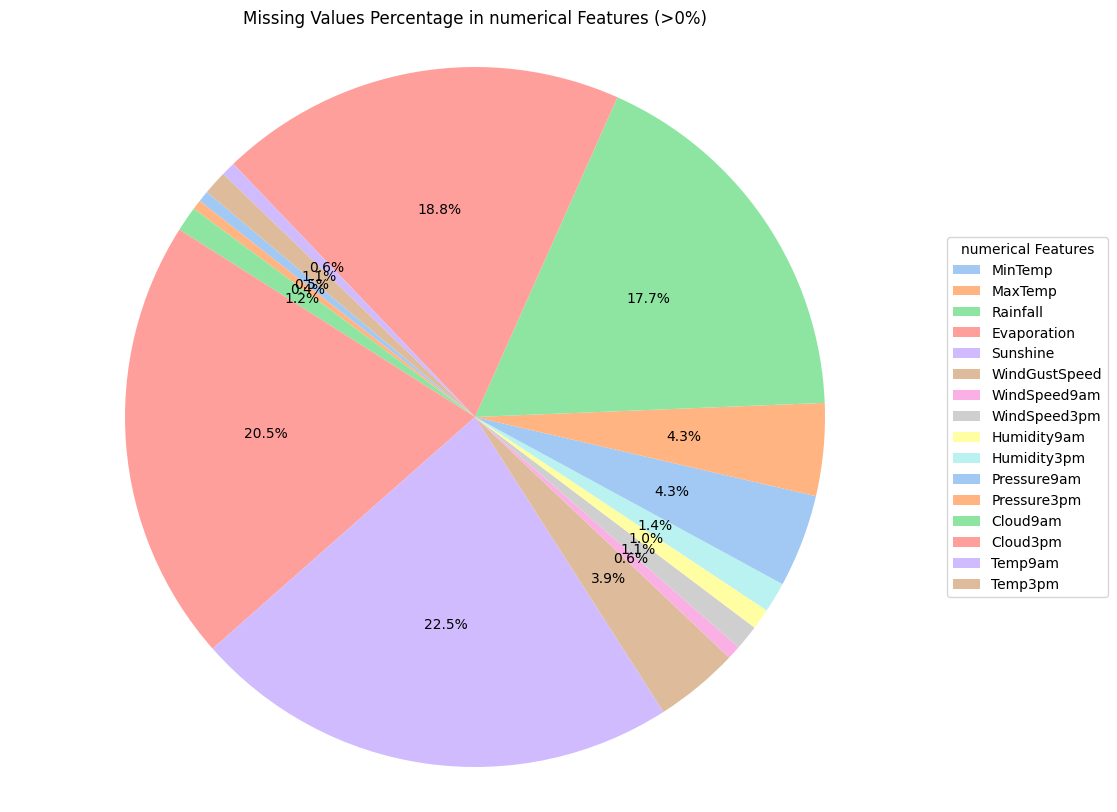

In [ ]:
missing_percentage = (df[numerical].isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]


plt.figure(figsize=(12,10))
wedges, texts, autotexts = plt.pie(
    missing_percentage,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.legend(wedges, missing_percentage.index, title="numerical Features", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Missing Values Percentage in numerical Features (>0%)')
plt.axis('equal')
plt.show()

In [ ]:
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Ýear,Month,Day
count,117587.000000,117780.000000,115975.000000,66969.000000,61816.000000,109068.000000,117286.000000,115995.000000,116474.000000,115371.000000,108037.000000,108072.000000,74109.000000,71272.000000,117264.000000,116101.000000,118904.000000,118904.000000,118904.000000
mean,11.986791,22.784057,2.404894,5.314471,7.444982,40.014331,14.047235,18.870494,70.164191,52.648638,1018.034718,1015.700055,4.584760,4.626684,16.628552,21.302015,2012.710884,6.389953,15.712936
std,6.232718,6.892528,8.587149,4.257907,3.818111,13.842610,9.143375,9.116173,18.299999,20.511548,7.006681,7.560201,2.871266,2.701306,6.261816,6.713870,2.535111,3.428259,8.794960
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,1.000000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.500000,17.800000,0.000000,2.600000,4.600000,30.000000,7.000000,13.000000,58.000000,38.000000,1013.400000,1011.100000,1.000000,2.000000,12.100000,16.500000,2010.000000,3.000000,8.000000
50%,11.900000,22.400000,0.000000,4.400000,8.200000,39.000000,13.000000,19.000000,71.000000,53.000000,1018.000000,1015.700000,5.000000,5.000000,16.500000,20.900000,2013.000000,6.000000,16.000000
75%,16.600000,27.500000,0.800000,7.200000,10.500000,48.000000,19.000000,24.000000,84.000000,66.000000,1022.700000,1020.300000,7.000000,7.000000,21.100000,25.800000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1038.200000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [ ]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  117587.0  117780.0  115975.0      66969.0   61816.0       109068.0   
mean       12.0      23.0       2.0          5.0       7.0           40.0   
std         6.0       7.0       9.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            7.0   
25%         8.0      18.0       0.0          3.0       5.0           30.0   
50%        12.0      22.0       0.0          4.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      10.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      117286.0      115995.0     116474.0     115371.0     108037.0   
mean           14.0          19.0         70.0         53.0       1018.0   
std             9.0           9.0         18.0         21.0          7.0   
mi

Text(0, 0.5, 'WindSpeed3pm')

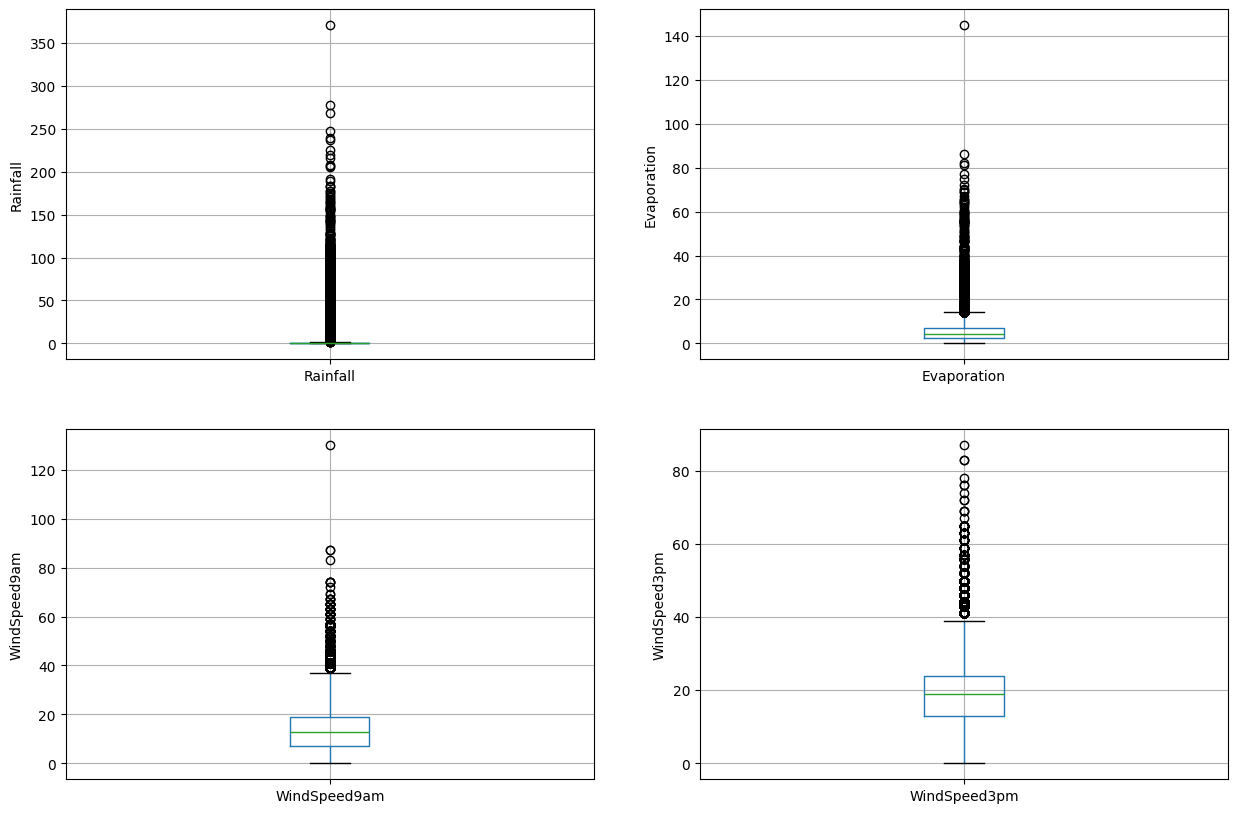

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig=df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2,2,2)
fig=df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2,2,3)
fig=df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2,2,4)
fig=df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

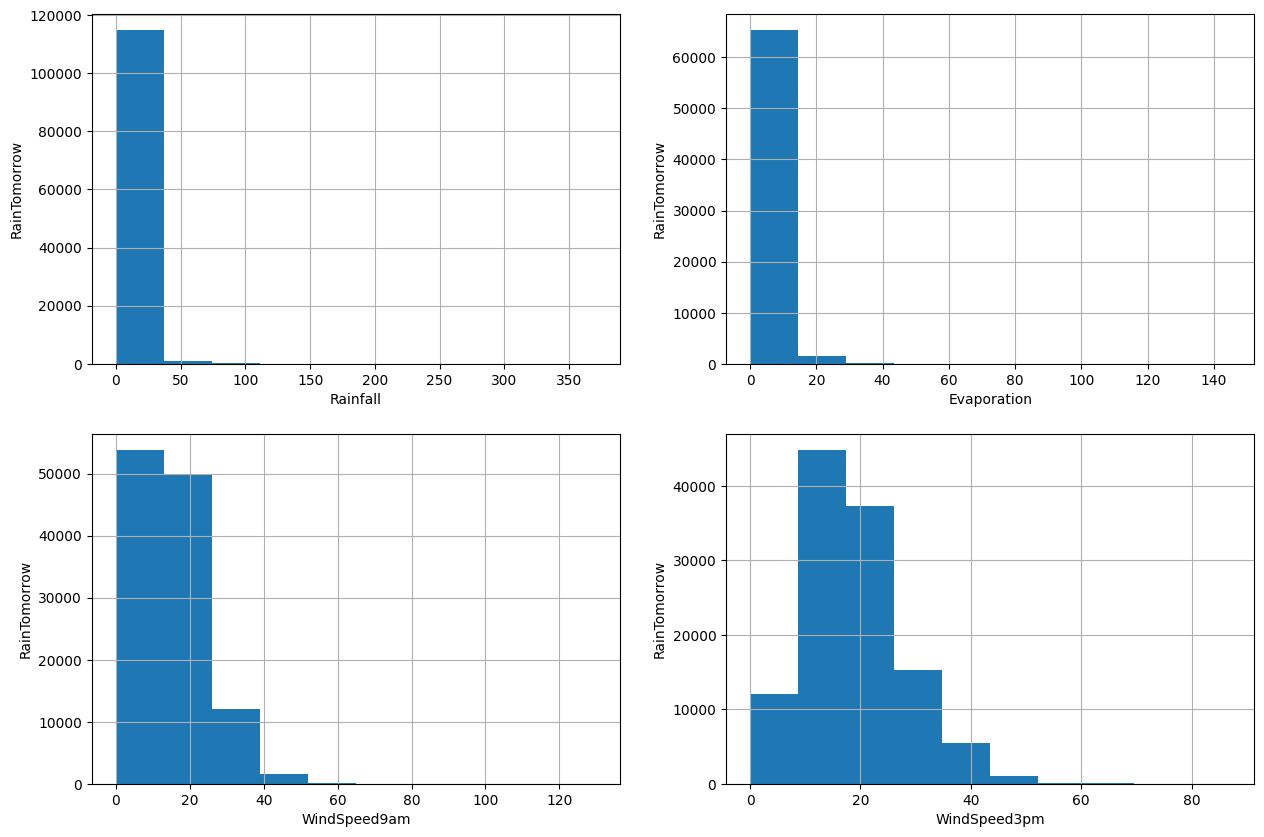

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2,2,2)
fig=df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [ ]:
q1=df.Rainfall.quantile(0.25)
q3=df.Rainfall.quantile(0.75)
IQR=q3-q1
Lower_fence=q1-(3*IQR)
Upper_fence=q3+(3*IQR)
print(' boundary : ',Lower_fence,'< Rainfall >',Upper_fence)

 boundary :  -2.4000000000000004 < Rainfall > 3.2


In [ ]:
q1=df.Evaporation.quantile(0.25)
q3=df.Evaporation.quantile(0.75)
IQR=q3-q1
Lower_fence=q1-(3*IQR)
Upper_fence=q3+(3*IQR)
print(' boundary : ',Lower_fence,'< Evaporation >',Upper_fence)

 boundary :  -11.2 < Evaporation > 21.0


In [ ]:
q1=df.WindSpeed9am.quantile(0.25)
q3=df.WindSpeed9am.quantile(0.75)
IQR=q3-q1
Lower_fence=q1-(3*IQR)
Upper_fence=q3+(3*IQR)
print(' boundary : ',Lower_fence,'< WindSpeed9am  >',Upper_fence)

 boundary :  -29.0 < WindSpeed9am  > 55.0


In [ ]:
q1=df.WindSpeed3pm.quantile(0.25)
q3=df.WindSpeed3pm.quantile(0.75)
IQR=q3-q1
Lower_fence=q1-(3*IQR)
Upper_fence=q3+(3*IQR)
print(' boundary : ',Lower_fence,'< WindSpeed3pm  >',Upper_fence)

 boundary :  -20.0 < WindSpeed3pm  > 57.0


In [ ]:
X=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [ ]:
y=y.fillna(y.mode()[0])

In [ ]:
y = y.replace({'No': 0, 'Yes': 1})

<ipython-input-79-79cea3c2c4da>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
print(y.isnull().sum())

0


In [ ]:
y.isnull().sum()

np.int64(0)

In [ ]:
print(y[:20])

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    1
11    1
12    1
13    0
14    0
15    0
16    1
17    1
18    0
19    0
Name: RainTomorrow, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
y_train.value_counts()

,count
RainTomorrow,
0,73952
1,21171


In [ ]:
X_train.shape, X_test.shape

((95123, 24), (23781, 24))

In [ ]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Ýear',
 'Month',
 'Day']

In [ ]:

X_train[numerical].isnull().sum()

,0
MinTemp,1057
MaxTemp,903
Rainfall,2359
Evaporation,41552
Sunshine,45790
WindGustSpeed,7858
WindSpeed9am,1283
WindSpeed3pm,2310
Humidity9am,1936
Humidity3pm,2820


In [ ]:

X_test[numerical].isnull().sum()

,0
MinTemp,260
MaxTemp,221
Rainfall,570
Evaporation,10383
Sunshine,11298
WindGustSpeed,1978
WindSpeed9am,335
WindSpeed3pm,599
Humidity9am,494
Humidity3pm,713


In [ ]:
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0111
MaxTemp 0.0095
Rainfall 0.0248
Evaporation 0.4368
Sunshine 0.4814
WindGustSpeed 0.0826
WindSpeed9am 0.0135
WindSpeed3pm 0.0243
Humidity9am 0.0204
Humidity3pm 0.0296
Pressure9am 0.0912
Pressure3pm 0.0908
Cloud9am 0.3776
Cloud3pm 0.4014
Temp9am 0.0138
Temp3pm 0.0235


In [ ]:
for df1 in[X_train, X_test] :
  for col in numerical :
    col_median=X_train[col].median()
    df1[col].fillna(col_median, inplace=True)


<ipython-input-91-4ea16a868b82>:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
X_train[numerical].isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [ ]:
X_test[numerical].isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [ ]:

X_train[categorical].isnull().mean()

,0
Location,0.000000
WindGustDir,0.082840
WindDir9am,0.077184
WindDir3pm,0.032810
RainToday,0.024810


In [ ]:

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

<ipython-input-95-1d743cbfd16f>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-95-1d743cbfd16f>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [ ]:

X_train[categorical].isnull().sum()

,0
Location,0
WindGustDir,0
WindDir9am,0
WindDir3pm,0
RainToday,0


In [ ]:
X_train.isnull().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [ ]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

,0
Location,0
WindGustDir,0
WindDir9am,0
WindDir3pm,0
RainToday,0


In [ ]:
# check missing values in X_train

X_train.isnull().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [ ]:
# check missing values in X_test

X_test.isnull().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [ ]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])  # df3["rainfalll"]= 3

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [ ]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [ ]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [ ]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [ ]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [ ]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Ýear,Month,Day
count,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000
mean,11.980239,22.778735,0.679606,4.876478,7.803169,39.930690,14.035575,18.865069,70.135877,52.634452,1018.039925,1015.703399,4.739684,4.776658,16.620422,21.288324,2012.709008,6.383871,15.704908
std,6.194756,6.861701,1.185091,2.810361,2.782074,13.256902,9.034560,8.974588,18.116814,20.222126,6.676490,7.356712,2.274488,2.099314,6.217314,6.633924,2.535440,3.428368,8.802490
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,1.000000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.800000,0.000000,4.000000,8.000000,31.000000,7.000000,13.000000,59.000000,39.000000,1013.900000,1011.600000,4.000000,4.000000,12.200000,16.600000,2010.000000,3.000000,8.000000
50%,11.900000,22.300000,0.000000,4.400000,8.200000,39.000000,13.000000,19.000000,71.000000,53.000000,1018.000000,1015.700000,5.000000,5.000000,16.500000,20.900000,2013.000000,6.000000,16.000000
75%,16.600000,27.500000,0.600000,5.000000,8.400000,46.000000,19.000000,24.000000,84.000000,66.000000,1022.200000,1019.800000,7.000000,6.000000,21.000000,25.700000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.300000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1038.000000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [ ]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
90094,Cairns,SSE,S,SE,Yes
19393,NorahHead,S,WSW,SSW,No
63882,Sale,NW,W,W,No
49057,Tuggeranong,NW,SE,WNW,No
11304,CoffsHarbour,WSW,WSW,SSE,No


In [ ]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Ýear,Month,Day
90094,Cairns,25.2,31.2,3.2,4.4,8.2,SSE,37.0,S,SE,...,1006.3,8.0,8.0,25.8,29.8,0,1,2017,1,31
19393,NorahHead,7.7,14.2,0.0,4.4,8.2,S,43.0,WSW,SSW,...,1019.6,5.0,5.0,11.0,13.8,1,0,2012,8,1
63882,Sale,5.2,16.7,0.0,4.4,8.2,NW,41.0,W,W,...,1012.8,7.0,8.0,12.3,13.9,1,0,2016,8,21
49057,Tuggeranong,10.9,30.8,0.0,4.4,8.2,NW,31.0,SE,WNW,...,1011.9,5.0,5.0,18.5,29.4,1,0,2009,1,4
11304,CoffsHarbour,8.8,20.6,0.0,4.4,8.2,WSW,26.0,WSW,SSE,...,1029.1,5.0,5.0,16.9,19.7,1,0,2015,5,25


In [ ]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location),
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [ ]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
90094,25.2,31.2,3.2,4.4,8.2,37.0,19.0,19.0,91.0,82.0,...,False,False,False,True,False,False,False,False,False,False
19393,7.7,14.2,0.0,4.4,8.2,43.0,13.0,22.0,66.0,60.0,...,False,False,False,False,False,True,False,False,False,False
63882,5.2,16.7,0.0,4.4,8.2,41.0,20.0,15.0,72.0,69.0,...,False,False,False,False,False,False,False,True,False,False
49057,10.9,30.8,0.0,4.4,8.2,31.0,9.0,15.0,64.0,35.0,...,False,False,False,False,False,False,False,False,True,False
11304,8.8,20.6,0.0,4.4,8.2,26.0,13.0,13.0,66.0,63.0,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
X_train.shape

(95123, 109)

In [ ]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location),
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [ ]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
88301,19.6,30.1,0.0,9.0,12.2,35.0,11.0,19.0,59.0,59.0,...,False,False,False,False,False,False,False,False,False,False
45940,8.3,28.5,0.0,5.8,9.8,46.0,2.0,26.0,66.0,30.0,...,False,True,False,False,False,False,False,False,False,False
10269,5.9,19.2,1.0,1.2,10.0,30.0,6.0,20.0,54.0,40.0,...,False,False,False,False,False,False,False,False,False,False
55223,10.9,28.6,0.0,4.4,8.2,35.0,19.0,6.0,53.0,29.0,...,False,False,True,False,False,False,False,False,False,False
69401,8.8,18.8,0.8,4.4,4.9,46.0,17.0,20.0,63.0,52.0,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Ýear,Month,Day,RainToday_0,RainToday_1
count,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,...,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000
mean,11.980239,22.778735,0.679606,4.876478,7.803169,39.930690,14.035575,18.865069,70.135877,52.634452,...,1015.703399,4.739684,4.776658,16.620422,21.288324,2012.709008,6.383871,15.704908,0.777551,0.222449
std,6.194756,6.861701,1.185091,2.810361,2.782074,13.256902,9.034560,8.974588,18.116814,20.222126,...,7.356712,2.274488,2.099314,6.217314,6.633924,2.535440,3.428368,8.802490,0.415893,0.415893
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000,0.000000,0.000000
25%,7.600000,17.800000,0.000000,4.000000,8.000000,31.000000,7.000000,13.000000,59.000000,39.000000,...,1011.600000,4.000000,4.000000,12.200000,16.600000,2010.000000,3.000000,8.000000,1.000000,0.000000
50%,11.900000,22.300000,0.000000,4.400000,8.200000,39.000000,13.000000,19.000000,71.000000,53.000000,...,1015.700000,5.000000,5.000000,16.500000,20.900000,2013.000000,6.000000,16.000000,1.000000,0.000000
75%,16.600000,27.500000,0.600000,5.000000,8.400000,46.000000,19.000000,24.000000,84.000000,66.000000,...,1019.800000,7.000000,6.000000,21.000000,25.700000,2015.000000,9.000000,23.000000,1.000000,0.000000
max,33.900000,48.100000,3.200000,21.800000,14.300000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1038.000000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000,1.000000,1.000000


In [ ]:
cols = X_train.columns
cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'],
      dtype='object', length=109)

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from collections import Counter
print(Counter(y_train))

smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X_train, y_train)
print(Counter(y_res_smote))
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_res_smote, y_res_smote)
y_pred_smote = model_smote.predict(X_test)
print("SMOTE:")
print(classification_report(y_test, y_pred_smote, digits=4))


Counter({0: 73952, 1: 21171})
Counter({1: 73952, 0: 73952})
SMOTE:
              precision    recall  f1-score   support

           0     0.9134    0.7853    0.8445     18423
           1     0.5020    0.7441    0.5995      5358

    accuracy                         0.7760     23781
   macro avg     0.7077    0.7647    0.7220     23781
weighted avg     0.8207    0.7760    0.7893     23781



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
print(f"Resampled class distribution: {Counter(y_resampled)}")
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("SMOTEENN Results:")
print(classification_report(y_test, y_pred))

Resampled class distribution: Counter({1: 68670, 0: 44619})
SMOTEENN Results:
              precision    recall  f1-score   support

           0       0.94      0.64      0.76     18423
           1       0.41      0.86      0.56      5358

    accuracy                           0.69     23781
   macro avg       0.68      0.75      0.66     23781
weighted avg       0.82      0.69      0.72     23781



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
ros = RandomOverSampler(random_state=42)
X_res_ros, y_res_ros = ros.fit_resample(X_train, y_train)
print(Counter(y_res_ros))
model_ros = LogisticRegression(random_state=42)
model_ros.fit(X_res_ros, y_res_ros)
y_pred_ros = model_ros.predict(X_test)
print("Random Oversampling:")
print(classification_report(y_test, y_pred_ros))

Counter({1: 73952, 0: 73952})
Random Oversampling:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     18423
           1       0.50      0.75      0.60      5358

    accuracy                           0.78     23781
   macro avg       0.71      0.77      0.72     23781
weighted avg       0.82      0.78      0.79     23781



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.preprocessing import MinMaxScaler  # 0 - 1

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.794811,0.680529,1.0,0.201835,0.573427,0.234375,0.345455,0.333333,0.91,0.82,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.382075,0.359168,0.0,0.201835,0.573427,0.281250,0.236364,0.385965,0.66,0.60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.323113,0.406427,0.0,0.201835,0.573427,0.265625,0.363636,0.263158,0.72,0.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.457547,0.672968,0.0,0.201835,0.573427,0.187500,0.163636,0.263158,0.64,0.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.408019,0.480151,0.0,0.201835,0.573427,0.148438,0.236364,0.228070,0.66,0.63,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,...,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000,95123.000000
mean,0.483025,0.521337,0.212377,0.223692,0.545676,0.257271,0.255192,0.330966,0.701359,0.526345,...,0.044942,0.052111,0.071749,0.070782,0.065421,0.055970,0.063886,0.106273,0.058093,0.068438
std,0.146103,0.129711,0.370341,0.128916,0.194551,0.103570,0.164265,0.157449,0.181168,0.202221,...,0.207177,0.222253,0.258074,0.256462,0.247268,0.229864,0.244551,0.308188,0.233921,0.252497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.427221,0.000000,0.183486,0.559441,0.187500,0.127273,0.228070,0.590000,0.390000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.481132,0.512287,0.000000,0.201835,0.573427,0.250000,0.236364,0.333333,0.710000,0.530000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.591981,0.610586,0.187500,0.229358,0.587413,0.304688,0.345455,0.421053,0.840000,0.660000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train[:5]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.794811,0.680529,1.0,0.201835,0.573427,0.234375,0.345455,0.333333,0.91,0.82,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.382075,0.359168,0.0,0.201835,0.573427,0.281250,0.236364,0.385965,0.66,0.60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.323113,0.406427,0.0,0.201835,0.573427,0.265625,0.363636,0.263158,0.72,0.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.457547,0.672968,0.0,0.201835,0.573427,0.187500,0.163636,0.263158,0.64,0.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.408019,0.480151,0.0,0.201835,0.573427,0.148438,0.236364,0.228070,0.66,0.63,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train[:5]

,RainTomorrow
90094,1
19393,0
63882,1
49057,0
11304,0


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    })


In [ ]:
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Accuracy', ascending=False))

                 Model  Accuracy  Precision    Recall  F1-Score
4        Random Forest  0.852151   0.844589  0.852151  0.838873
5                  SVM  0.850469   0.843063  0.850469  0.836025
0  Logistic Regression  0.842059   0.831644  0.842059  0.830174
2                  KNN  0.800135   0.779206  0.800135  0.781703
3        Decision Tree  0.785585   0.785685  0.785585  0.785635
1          Naive Bayes  0.677263   0.768301  0.677263  0.702200


In [ ]:
best_model_name = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]['Model']
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest


In [ ]:
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

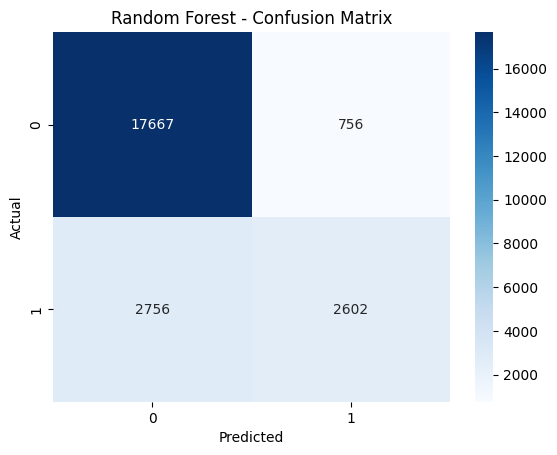

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title(f'{best_model_name} - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     18423
           1       0.77      0.49      0.60      5358

    accuracy                           0.85     23781
   macro avg       0.82      0.72      0.75     23781
weighted avg       0.84      0.85      0.84     23781

